In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('base_api_IM.csv')
data

,chipset,memory,core_clock,boost_clock,CUDA,Metal,OpenCL,Vulkan,api_score
0,GeForce RTX 3060,12.0,1320.0,1777.0,38.423837,NaN,42.502579,52.363437,44.43
1,GeForce RTX 3060,8.0,1320.0,1867.0,38.423837,NaN,42.502579,52.363437,44.43
2,Radeon RX 6600,8.0,1626.0,1626.0,NaN,45.873239,33.765534,43.437201,41.03
3,Radeon RX 6800 XT,16.0,1825.0,2250.0,NaN,90.238785,68.980667,70.023694,76.41
4,Radeon RX 6700 XT,12.0,2321.0,2321.0,NaN,NaN,45.336868,49.095815,47.22
...,...,...,...,...,...,...,...,...,...
271,Radeon HD 5570,2.0,NaN,NaN,NaN,NaN,1.471375,NaN,1.47
272,GeForce GTX 465,1.0,607.0,607.0,NaN,NaN,4.406581,NaN,4.41
273,GeForce GTX 460 SE,1.0,660.0,660.0,NaN,NaN,3.232240,NaN,3.23
274,GeForce GTX 560 SE,1.0,746.0,746.0,NaN,NaN,3.610461,NaN,3.61


In [8]:
data_condensed = data.drop(columns=['CUDA', 'Metal', 'OpenCL', 'Vulkan'])
data_condensed = data_condensed.dropna(subset=['core_clock', 'boost_clock'])
data_condensed

,chipset,memory,core_clock,boost_clock,api_score
0,GeForce RTX 3060,12.0,1320.0,1777.0,44.43
1,GeForce RTX 3060,8.0,1320.0,1867.0,44.43
2,Radeon RX 6600,8.0,1626.0,1626.0,41.03
3,Radeon RX 6800 XT,16.0,1825.0,2250.0,76.41
4,Radeon RX 6700 XT,12.0,2321.0,2321.0,47.22
...,...,...,...,...,...
270,Radeon HD 5570,1.0,650.0,650.0,1.47
272,GeForce GTX 465,1.0,607.0,607.0,4.41
273,GeForce GTX 460 SE,1.0,660.0,660.0,3.23
274,GeForce GTX 560 SE,1.0,746.0,746.0,3.61


In [9]:
#CSV file has columns 'X' and 'y' for features and target
X = data_condensed[['memory', 'core_clock', 'boost_clock']]
y = data_condensed['api_score']

#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#Create and train model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 122.8266809224319


In [11]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42, alpha=0.2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 101.58980156243325


In [15]:
# from sklearn.isotonic import IsotonicRegression

# model = IsotonicRegression()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")

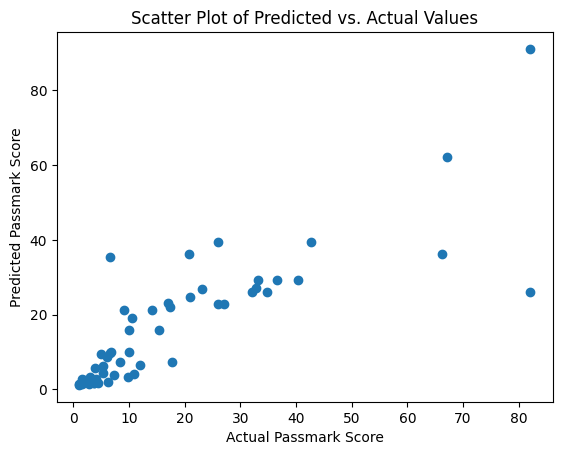

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Passmark Score")
plt.ylabel("Predicted Passmark Score")
plt.title("Scatter Plot of Predicted vs. Actual Values")
plt.show()

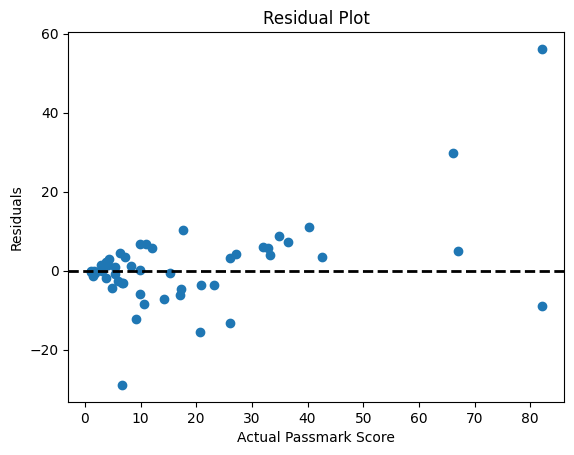

In [17]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel("Actual Passmark Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

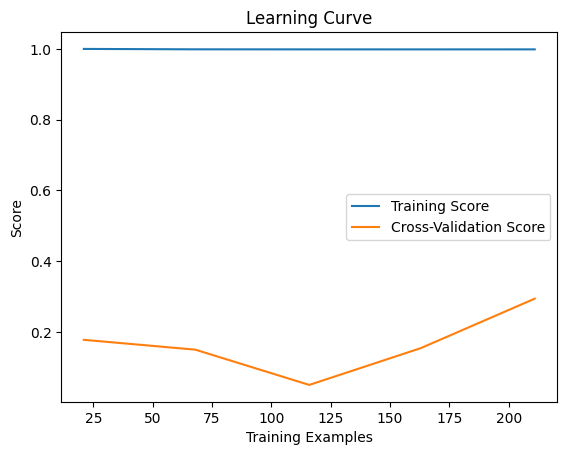

In [18]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [19]:
import pickle

def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

save_model(model, 'PDpassmark.pkl')